In [33]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import geopandas as gpd


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("data/vehicle_larceny_loc.csv")
df.head()

ADDR_PCT_CD    BORO_NM   Latitude  Longitude           CMPLANT_DT
0            1  MANHATTAN  40.717680 -74.015769  2021-09-24 08:00:00
1           44      BRONX  40.836559 -73.914274  2021-09-23 19:00:00
2           32  MANHATTAN  40.829882 -73.936758  2021-09-28 22:45:00
3           63   BROOKLYN  40.620871 -73.903697  2021-09-30 02:30:00
4          110     QUEENS  40.745162 -73.887837  2021-09-27 00:15:00

In [36]:
df.iloc[:,-1]

0       2021-09-24 08:00:00
1       2021-09-23 19:00:00
2       2021-09-28 22:45:00
3       2021-09-30 02:30:00
4       2021-09-27 00:15:00
               ...         
7472    2020-12-31 16:30:00
7473    2021-01-02 21:00:00
7474    2021-01-04 10:50:00
7475    2021-01-01 15:00:00
7476    2021-01-06 16:00:00
Name: CMPLANT_DT, Length: 7477, dtype: object

In [37]:
df.iloc[:,:-1]

ADDR_PCT_CD    BORO_NM   Latitude  Longitude
0               1  MANHATTAN  40.717680 -74.015769
1              44      BRONX  40.836559 -73.914274
2              32  MANHATTAN  40.829882 -73.936758
3              63   BROOKLYN  40.620871 -73.903697
4             110     QUEENS  40.745162 -73.887837
...           ...        ...        ...        ...
7472          107     QUEENS  40.730447 -73.826015
7473           47      BRONX  40.898670 -73.854845
7474           48      BRONX  40.857312 -73.891458
7475           73   BROOKLYN  40.671568 -73.916068
7476           43      BRONX  40.834481 -73.862408

[7477 rows x 4 columns]

In [38]:
df.columns

Index(['ADDR_PCT_CD', 'BORO_NM', 'Latitude', 'Longitude', 'CMPLANT_DT'], dtype='object')

In [39]:
df.describe()

ADDR_PCT_CD     Latitude    Longitude
count  7477.000000  7477.000000  7477.000000
mean     67.299184    40.748183   -73.905370
std      32.202986     0.084774     0.069986
min       1.000000    40.503136   -74.250114
25%      43.000000    40.679580   -73.948251
50%      67.000000    40.742238   -73.904244
75%     102.000000    40.828350   -73.862082
max     123.000000    40.912723   -73.704437

In [40]:
df.isnull().sum()

ADDR_PCT_CD    0
BORO_NM        0
Latitude       0
Longitude      0
CMPLANT_DT     0
dtype: int64

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.shape

(7470, 5)

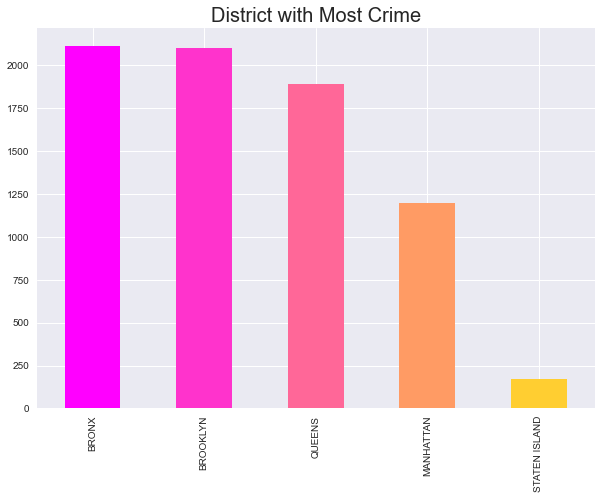

In [43]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 20, 100))
df['BORO_NM'].value_counts().plot.bar(color = color, figsize = (10, 7))

plt.title('District with Most Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [44]:
df['CMPLANT_DT'] = pd.to_datetime(df['CMPLANT_DT'])
df['Date'] = pd.to_datetime(df['CMPLANT_DT'].dt.date)
df['Day'] = df['CMPLANT_DT'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek
df['DayOfWeek'] = df['CMPLANT_DT'].dt.day_name()
df['Month'] = df['CMPLANT_DT'].dt.strftime('%b')
df['Year'] = df['CMPLANT_DT'].dt.year
df['Hour'] = df['CMPLANT_DT'].dt.hour

In [45]:
df.head()

ADDR_PCT_CD    BORO_NM   Latitude  Longitude          CMPLANT_DT  \
0            1  MANHATTAN  40.717680 -74.015769 2021-09-24 08:00:00   
1           44      BRONX  40.836559 -73.914274 2021-09-23 19:00:00   
2           32  MANHATTAN  40.829882 -73.936758 2021-09-28 22:45:00   
3           63   BROOKLYN  40.620871 -73.903697 2021-09-30 02:30:00   
4          110     QUEENS  40.745162 -73.887837 2021-09-27 00:15:00   

        Date  Day  Weekday DayOfWeek Month  Year  Hour  
0 2021-09-24   24        4    Friday   Sep  2021     8  
1 2021-09-23   23        3  Thursday   Sep  2021    19  
2 2021-09-28   28        1   Tuesday   Sep  2021    22  
3 2021-09-30   30        3  Thursday   Sep  2021     2  
4 2021-09-27   27        0    Monday   Sep  2021     0

In [46]:
df['Year'].unique()

array([2021, 2020, 2012, 2015, 2019], dtype=int64)

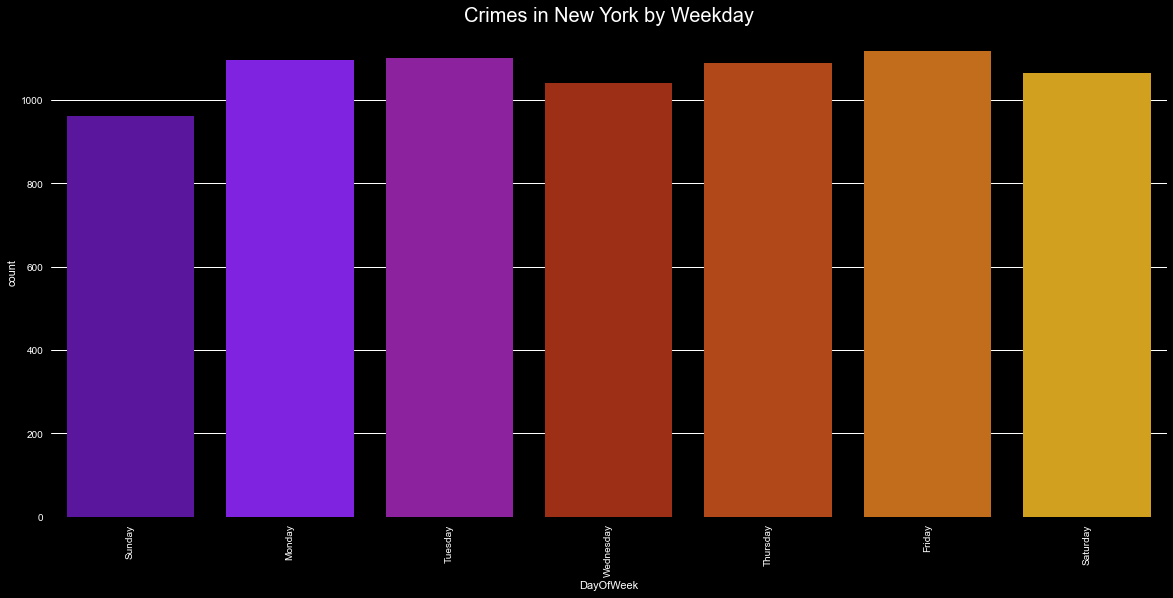

In [47]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['DayOfWeek'], palette = 'gnuplot', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

plt.title('Crimes in New York by Weekday', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

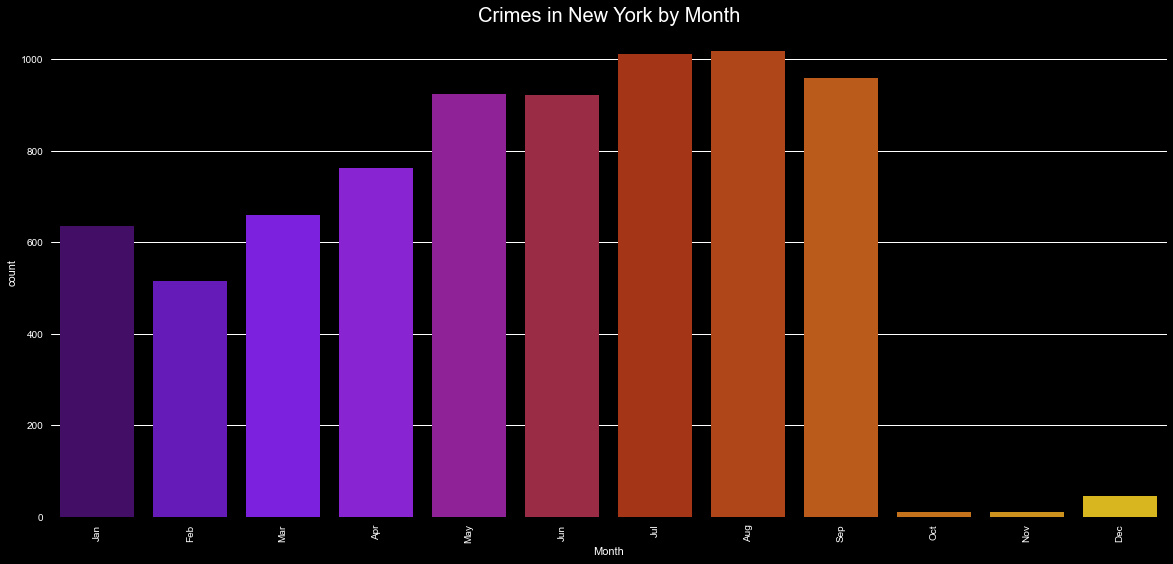

In [48]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['Month'], palette = 'gnuplot', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.title('Crimes in New York by Month', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

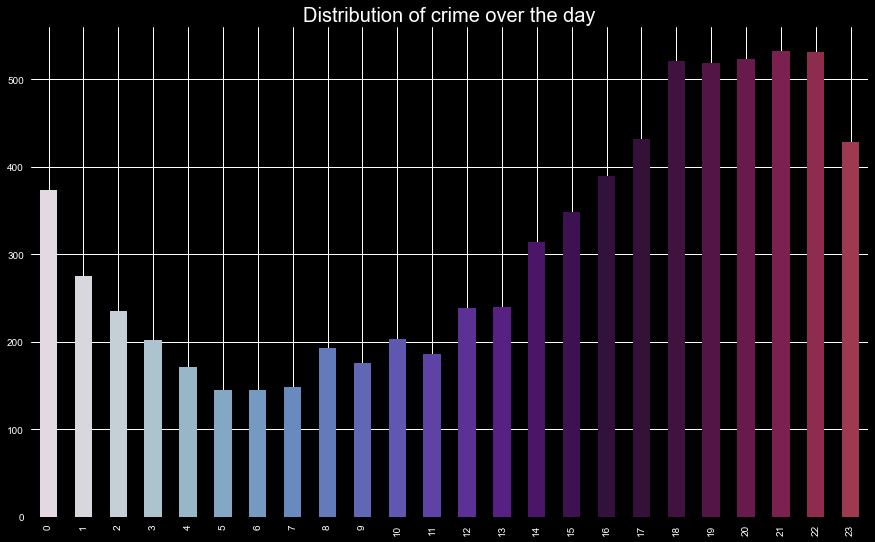

In [49]:
color = plt.cm.twilight(np.linspace(0, 3, 100))
df['Hour'].value_counts().sort_index().plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [50]:
df['BORO_NM'].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [51]:
X = df[['Latitude', 'Longitude']]
X

Latitude  Longitude
0     40.717680 -74.015769
1     40.836559 -73.914274
2     40.829882 -73.936758
3     40.620871 -73.903697
4     40.745162 -73.887837
...         ...        ...
7472  40.730447 -73.826015
7473  40.898670 -73.854845
7474  40.857312 -73.891458
7475  40.671568 -73.916068
7476  40.834481 -73.862408

[7470 rows x 2 columns]

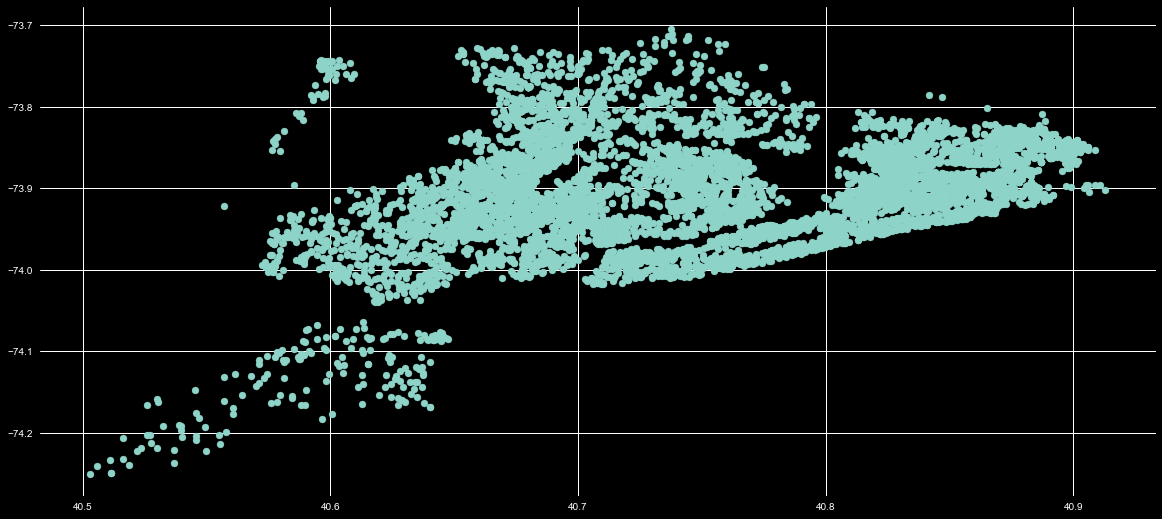

In [52]:
#X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)
plt.scatter(X.iloc[:,0], X.iloc[:,1])

Text(0, 0.5, 'WCSS')

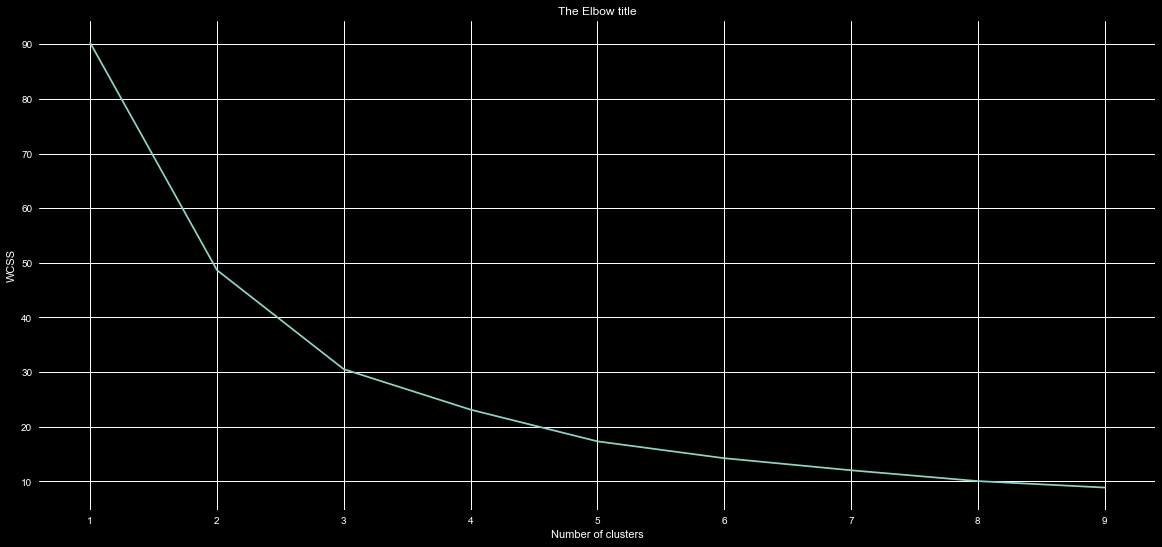

In [53]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [54]:
#Categorizing the data using the optimum number of clusters (6) we determined in the last step. 
#k-means++ ensures that you get don’t fall into the random initialization trap.

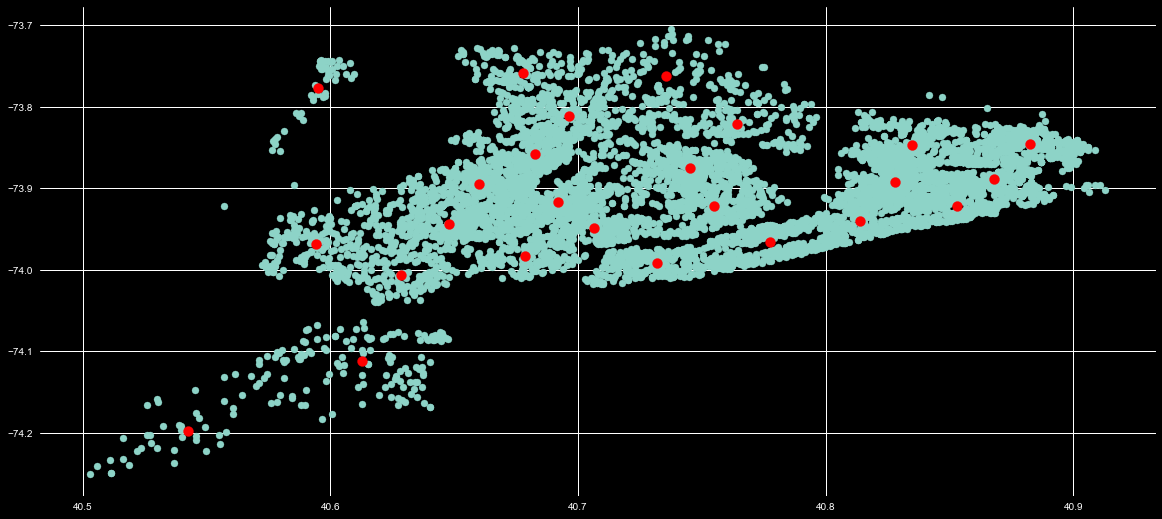

In [55]:
kmeans = KMeans(n_clusters=25, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

In [56]:
kmeans.cluster_centers_

array([[ 40.68250981, -73.85862307],
       [ 40.83489401, -73.84700444],
       [ 40.73175321, -73.99184577],
       [ 40.54250507, -74.1984005 ],
       [ 40.677913  , -73.75869767],
       [ 40.64776846, -73.94364097],
       [ 40.81374433, -73.93999266],
       [ 40.74511152, -73.87549   ],
       [ 40.66010022, -73.89461007],
       [ 40.82781739, -73.89293453],
       [ 40.86804839, -73.88820572],
       [ 40.76420657, -73.8211472 ],
       [ 40.77765778, -73.96634627],
       [ 40.62837502, -74.00619819],
       [ 40.59501901, -73.77718371],
       [ 40.69624362, -73.81178084],
       [ 40.67862866, -73.98330798],
       [ 40.75487164, -73.92227519],
       [ 40.69187272, -73.91695939],
       [ 40.88263546, -73.84629021],
       [ 40.59437644, -73.96857998],
       [ 40.85297225, -73.92197832],
       [ 40.70656106, -73.94913679],
       [ 40.6128031 , -74.11188773],
       [ 40.73531384, -73.76186556]])

In [57]:
kmeans = KMeans(25)
kmeans.fit(X)

KMeans(n_clusters=25)

In [58]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([15,  4,  8, ..., 24, 22,  1])

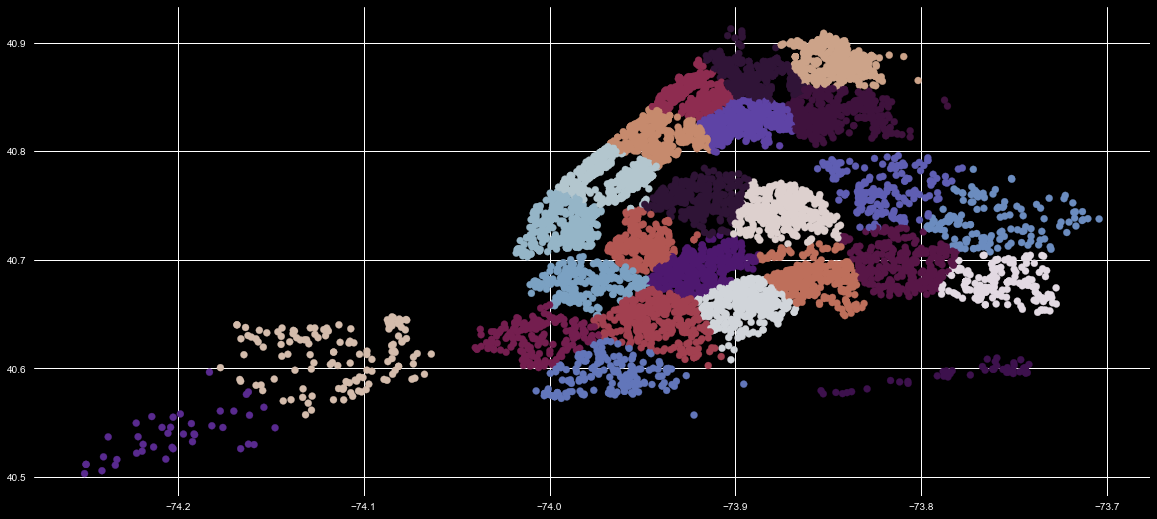

In [82]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='twilight_shifted_r')

Text(0, 0.5, 'WCSS')

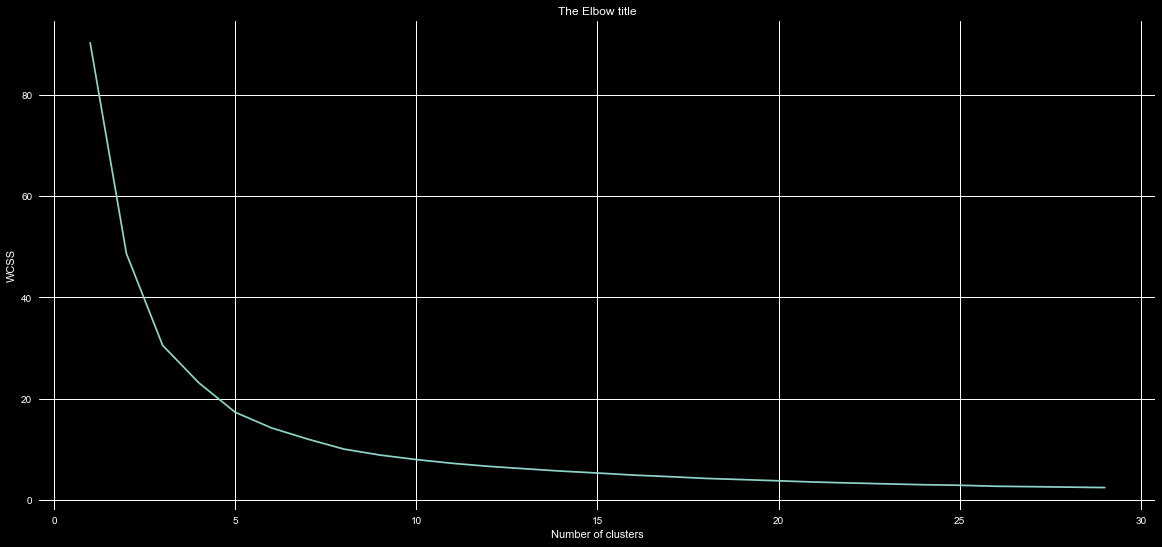

In [83]:
wcss=[]
for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [61]:
nb = 'data/Police Precincts/geo_export_4e4c80fb-a2b9-47d1-83ba-2b0eb65da799.shp'
regions = gpd.read_file(nb)
regions['precinct'] = regions['precinct'].astype(int)
regions.sample(5)

precinct    shape_area     shape_leng  \
50        79  4.497555e+07   28256.602113   
5          7  1.836402e+07   17301.308350   
4         72  1.046227e+08   88402.045979   
34        50  1.361126e+08   52230.474344   
62       105  3.473285e+08  133587.486103   

                                             geometry  
50  POLYGON ((-73.93857 40.69885, -73.93849 40.698...  
5   POLYGON ((-73.97345 40.71896, -73.97351 40.718...  
4   POLYGON ((-73.99841 40.67187, -73.99830 40.671...  
34  POLYGON ((-73.90246 40.91296, -73.90096 40.912...  
62  MULTIPOLYGON (((-73.74147 40.63496, -73.74149 ...

In [65]:
df_count = df[["ADDR_PCT_CD","CMPLANT_DT"]].groupby(by=["ADDR_PCT_CD"]).count()
#df_count = df_count.reset_index()  
df_count['latitude'] = df[["ADDR_PCT_CD","Latitude"]].groupby(by=["ADDR_PCT_CD"]).median()
df_count['longitude'] = df[["ADDR_PCT_CD","Longitude"]].groupby(by=["ADDR_PCT_CD"]).median()
df_count = df_count.reset_index()  

df_count

ADDR_PCT_CD  CMPLANT_DT   latitude  longitude
0             1          51  40.712998 -74.009463
1             5          24  40.717563 -73.996345
2             6          39  40.733952 -74.001524
3             7          48  40.715163 -73.986193
4             9          81  40.724455 -73.983758
..          ...         ...        ...        ...
71          115         159  40.756568 -73.876003
72          120          53  40.630021 -74.086095
73          121          38  40.624381 -74.154138
74          122          48  40.586949 -74.107077
75          123          34  40.531360 -74.205831

[76 rows x 4 columns]

In [67]:
merged = regions.set_index('precinct').join(df_count.set_index('ADDR_PCT_CD'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged.sample(5)

precinct    shape_area     shape_leng  \
48        76  4.823965e+07   68155.187882   
57       100  2.048225e+08  279581.795604   
18        26  2.383601e+07   23938.496899   
62       105  3.473285e+08  133587.486103   
45        73  5.177186e+07   33034.660940   

                                             geometry  CMPLANT_DT   latitude  \
48  POLYGON ((-74.00174 40.69241, -74.00050 40.691...        38.0  40.680905   
57  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...        13.0  40.579493   
18  POLYGON ((-73.94608 40.82126, -73.94640 40.820...        38.0  40.812909   
62  MULTIPOLYGON (((-73.74147 40.63496, -73.74149 ...       109.0  40.679260   
45  POLYGON ((-73.90405 40.67922, -73.90334 40.678...       108.0  40.670663   

    longitude  
48 -73.999607  
57 -73.837552  
18 -73.959287  
62 -73.740034  
45 -73.910568

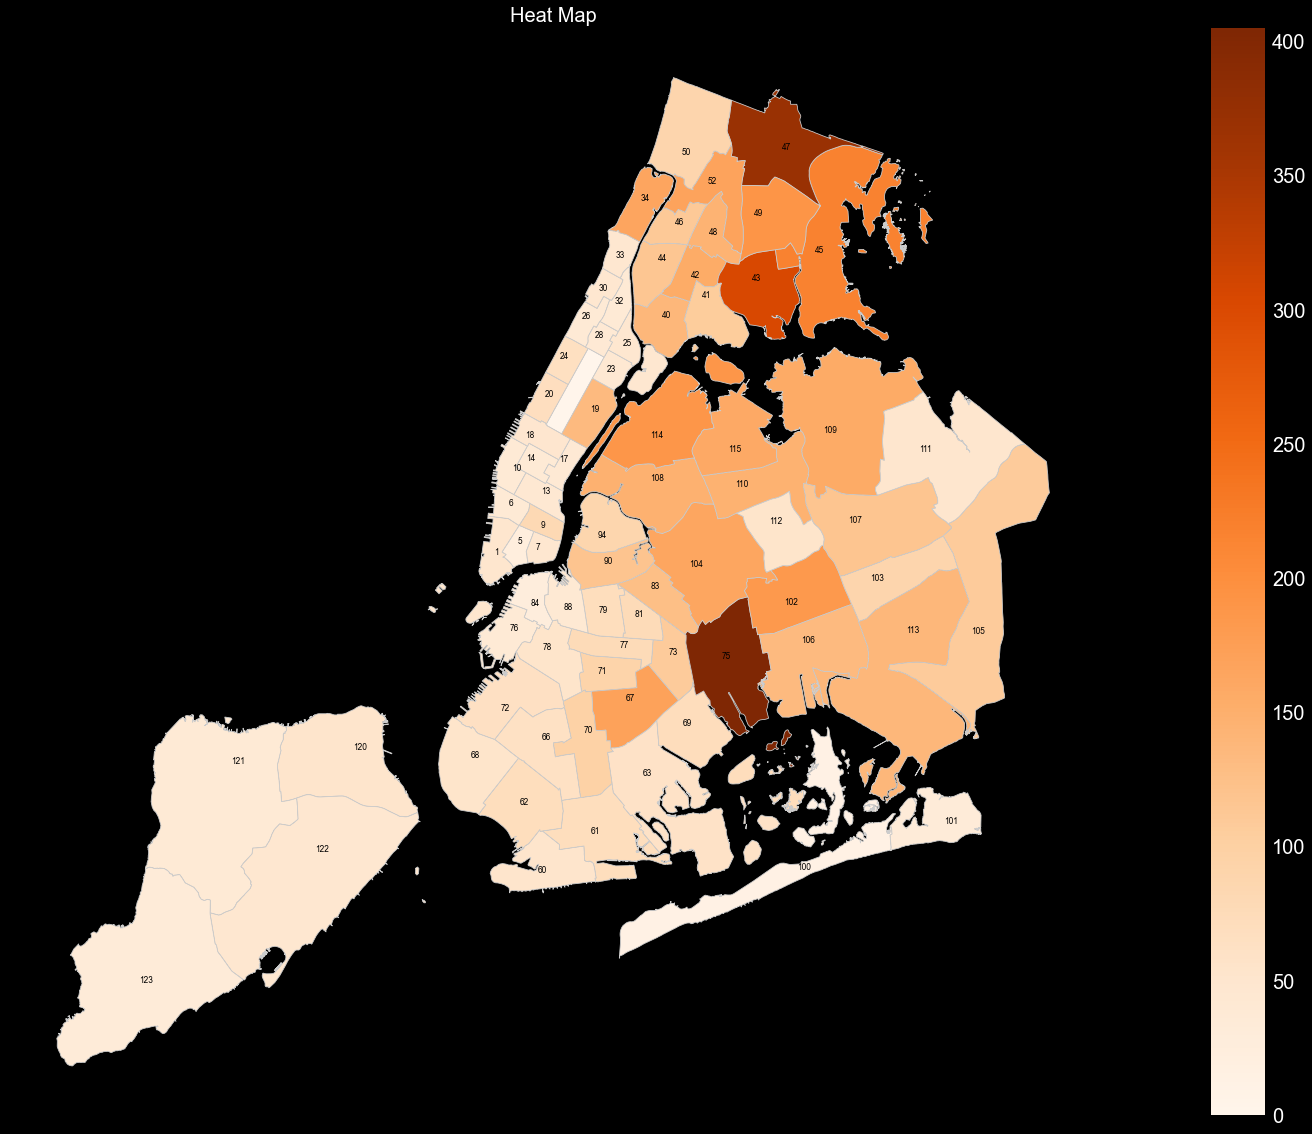

In [73]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map', fontdict={'fontsize': '20', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, df_count['CMPLANT_DT'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('CMPLANT_DT', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

for idx, row in merged.iterrows():
    if(row['CMPLANT_DT'] > 1):
        plt.annotate(s=row['precinct'], xy=(row['longitude'], row['latitude']),
                 horizontalalignment='center', fontsize='small', color='black', wrap=True)

plt.show()

In [84]:
df_count[df_count['ADDR_PCT_CD'] == 19]

ADDR_PCT_CD  CMPLANT_DT   latitude  longitude
10           19         133  40.773825 -73.954288

In [88]:
from folium.plugins import HeatMap
import folium

In [86]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_wm = nyc.to_crs({'init':'epsg:3857'})

In [106]:
max_amount = df_count['CMPLANT_DT'].max()

hmap = folium.Map(location=[40.715, -73.915], zoom_start=10, )

hm_wide = HeatMap( list(zip(df_count.latitude.values, df_count.longitude.values, df_count.CMPLANT_DT.values.astype(float))),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(nyc_wm).add_to(hmap)
hmap.add_child(hm_wide)

In [105]:
hmap = folium.Map(location=[40.715, -73.915], zoom_start=10, )
hmap